<a href="https://colab.research.google.com/github/tijira/CAI_2019/blob/master/mnist_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comment

In [1]:
# load MNIST data set
from keras.datasets import mnist	 	#dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 	#Keras function

print ("mnist data downloaded...")

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
mnist data downloaded...


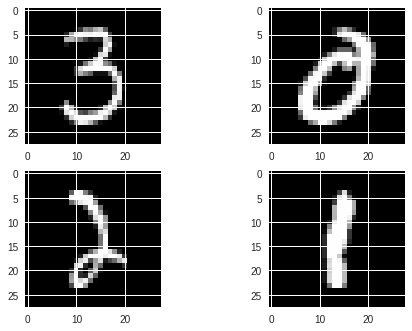

In [2]:
# comment if do not want to print

import matplotlib.pyplot as plt			#to plot images

plt.subplot(221)	
plt.imshow(X_train[50], cmap=plt.get_cmap('gray')) # ploting first image of training data set
plt.subplot(222)
plt.imshow(X_train[1304], cmap=plt.get_cmap('gray'))	# ploting 135th image in training data set
plt.subplot(223)
plt.imshow(X_test[244], cmap=plt.get_cmap('gray'))	# ploting 2445th image of test date set
plt.subplot(224)
plt.imshow(X_test[39], cmap=plt.get_cmap('gray'))	# ploting 4th image of test data set
# show the plot
plt.show()

In [6]:
# Print shape of dataset..it will print three tuples, namely the no. of images in dataset, height and width(60000, 28, 28)

print (X_train.shape)

(60000, 784)


In [8]:
# Step 3: Preprocess input data for Keras

# flatten 28*28 images to a 784 vector for each image and pixel precision set to 32 bit
num_pixels = X_train.shape[1] 
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Step 4: Preprocess class labels
# check shape of our class label data

print (Y_train.shape)
#We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.


(60000,)


In [9]:
#check labels for the first 10 training samples:
print (Y_train[:10])
# output of the form [5 0 4 1 9 2 1 3 1 4]
#The Y_train and Y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values.

[5 0 4 1 9 2 1 3 1 4]


Comments

In [10]:
from keras.utils import np_utils		#for transforming data 

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

# check again	
print (Y_train.shape)
# (60000, 10)
print (Y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
# Define model architecture

from keras.models import Sequential		#model
from keras.layers import Dense			#layer
from keras.layers import Dropout		#layer
from keras import initializers      # for importing initializers of keras

model = Sequential()
#hidden layer with relu as activation function
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer=initializers.RandomNormal(), activation='relu')) 

#only one hidden layer with relu as activation function	
#model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer=initializers.Constant(value=5), activation='relu')) 

#output layer with softmax as activation function
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))					


#print(model.summary())

print ("congrts model defined...")

Instructions for updating:
Colocations handled automatically by placer.
congrts model defined...


In [12]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

print ("Compilation done ...")

Compilation done ...


In [13]:
#Train model


model.fit(X_train, Y_train,validation_split=0.2, epochs=2, batch_size=200, verbose=1)


print ("parameter tuning done...")

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 6s 126us/step - loss: 1.6531 - acc: 0.6216 - val_loss: 0.9253 - val_acc: 0.8123
Epoch 2/2
48000/48000 [==============================] - 5s 108us/step - loss: 0.7034 - acc: 0.8356 - val_loss: 0.5260 - val_acc: 0.8713
parameter tuning done...


In [14]:
# Step 8: Evaluate model
scores = model.evaluate(X_test, Y_test)
print("Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 1s 60us/step
Error: 12.87%


In [15]:
print(model.metrics_names)

['loss', 'acc']


In [16]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None
